<a href="https://colab.research.google.com/github/RMLAI/Projects/blob/master/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting the Heart Disease Incidence using Machine Learning**

This notebook looks at the various Python based ML libraries in attempt to build an ML model capable of predicting whether a person can have a heart disease or not by analyzing medical attributes

**The Approach:**


1.   Problem Definition
2.   Data collection and EDA
3.   Evaluation 
4.   Features Engineering
5.   Modelling
6.   Experimentation


**1. Problem Definition**

> Given the various medical attributes(predictor variables) can we predict the incidence of heart disease in patients?

**2. Data Collection**

>The original data is from the UCI ML data repository
Link - https://archive.ics.uci.edu/ml/datasets/Heart+Disease

**3.Evaluation**

Selecting the evaluation metric is necessary before the project to ensure whether to give the greenlight the project or to kill it

**4.Features**
Features or variables are the predictors which determine the status of the response variable. Various operations may be done on the features like feature engineering - like normalization, combining various features, PCA, etc.
EDA is also done to gain some initial understanding

**Heart Disease Data Dictionary**

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).


age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more

slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)
Note: No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

In [ ]:
cd drive/My Drive/Data

[Errno 2] No such file or directory: 'drive/My Drive/Data'
/content/drive/My Drive/Data


In [ ]:
#Imporing the common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import the most useful binary classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Import Model evaluators
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score
from sklearn.metrics import plot_roc_curve

In [ ]:
#Load the data
df=pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#randomly filling the ones with zeros to ensure the real world scenario of smaller positive targets and create an unbalanced dataset
np.random.seed(42)
v = df.target.values == 1
df.loc[v, 'target'] = np.random.choice((0, 1), v.sum(), p=(.8, .2))

In [ ]:
df.target.value_counts()

0    270
1     33
Name: target, dtype: int64

**EDA**

The purpose of EDA is to get familiar with the dataset. The basic summary statistics questions can be answered here like the counts. We can make the crosstabs, pivot tables to see where the target variable is positive
Few things we want to derive from EDA are :



1.   What question(s) are you trying to solve (or prove wrong)?
2.What kind of data do you have and how do you treat different types?
3.What’s missing from the data and how do you deal with it?
4.Where are the outliers and why should you care about them?
5.How can you add, change or remove features to get more out of your data?





In [ ]:
#checking the head and tail of the dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,0


In [ ]:
#checking the tail of the dataset
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#See the value counts of the target variable, how many are positive , negative or does it have any missing data
df['target'].value_counts(),df['target'].value_counts(normalize=True)

(0    270
 1     33
 Name: target, dtype: int64, 0    0.891089
 1    0.108911
 Name: target, dtype: float64)

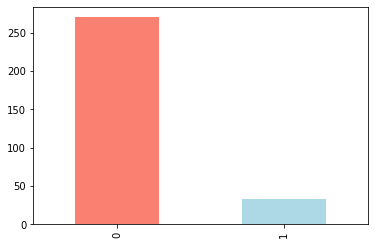

In [ ]:
#Plotting the target variables to get a visual on the imbalance in data
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'],);

Since the negative cases are majority (nearly 90%), this is an **unbalanced** dataset. We need to utilize different sampling techniques to ensure the models give consistant results

df.info() shows a quick insight to the number of missing values you have and what type of data your working with.

In our case, there are no missing values and all of our columns are numerical in nature.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no missing cells here , so any kind of imputation for the missing data is not required. To check more on imputation methodologies in sklearn we can refer to the link - https://scikit-learn.org/stable/modules/impute.html

Create various **Pivot Tables** to study the counts of the target variables with different features to find any patterns and generate hypothesis

In [ ]:
#using pandas pivot_table function to make excel style pivot tables
table1 = pd.pivot_table(df,values='target',index='age',columns='sex',aggfunc='count',margins_name='True',margins='Total')
table1

sex,0,1,True
age,,,
29,NaN,1.0,1
34,1.0,1.0,2
35,1.0,3.0,4
37,1.0,1.0,2
38,NaN,3.0,3
39,2.0,2.0,4
40,NaN,3.0,3
41,4.0,6.0,10
42,2.0,6.0,8


There are 9 out of 96 females that had heart attach while there 18 out of 207 males with heart attack

In [ ]:
# Get the descriptive statisticcs of your data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


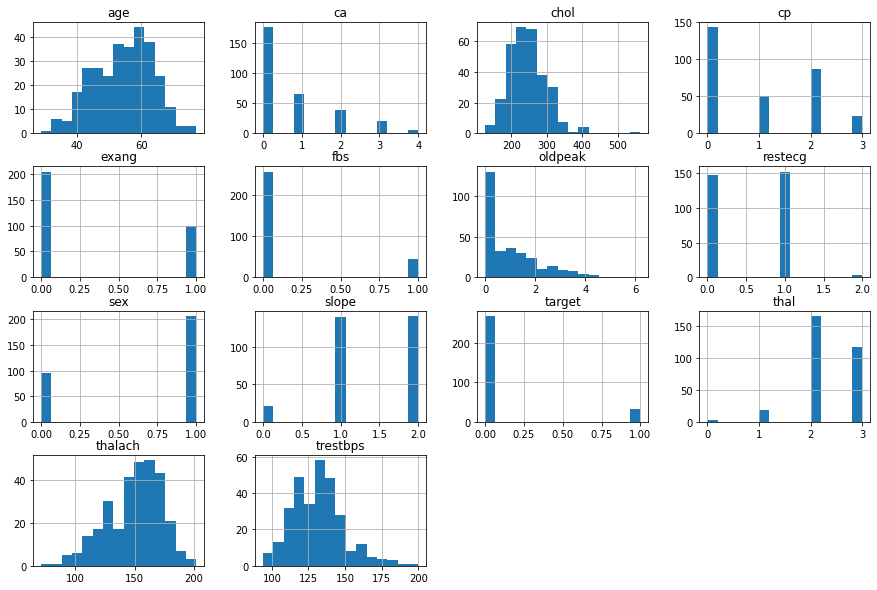

In [ ]:
# creating histogram plot of the variables
df.hist(bins=15,figsize=(15,10),layout=(4,4));
#plt.show()

In [ ]:
#checking what columns are there in data
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
table2=pd.pivot_table(df,values='target',index='thal',columns='sex',aggfunc='sum',margins=True,margins_name='Total')
table2

sex,0,1,Total
thal,,,
0,0,0,0
1,0,2,2
2,15,11,26
3,1,4,5
Total,16,17,33


In [ ]:
#table 3 - relationship with slope  , age with target
# people with slope 2 have very high heart disease risk
table3=pd.pivot_table(df,values='target',index='slope',columns='sex',aggfunc='sum',margins=True,margins_name='Total')
table3

sex,0,1,Total
slope,,,
0,1,2,3
1,6,4,10
2,9,11,20
Total,16,17,33


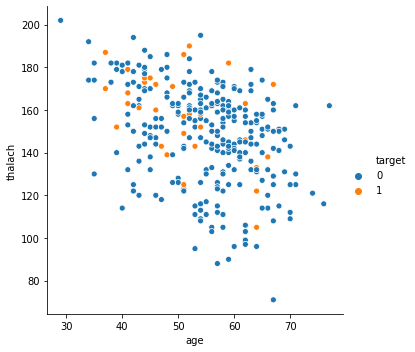

In [ ]:
#plot the bivariate plots with the target
sns.relplot(x="age", y="thalach", hue="target", data=df);

In [ ]:
#table 4 - relationship with slope  , age with target
# people with slope 2 have very high heart disease risk
table4=pd.pivot_table(df,values='target',index='thalach',columns='sex',aggfunc='sum',margins=True,margins_name='Total')
table4

sex,0,1,Total
thalach,,,
71,NaN,0.0,0
88,NaN,0.0,0
90,NaN,0.0,0
95,NaN,0.0,0
96,0.0,0.0,0
...,...,...,...
192,0.0,NaN,0
194,NaN,0.0,0
195,NaN,0.0,0


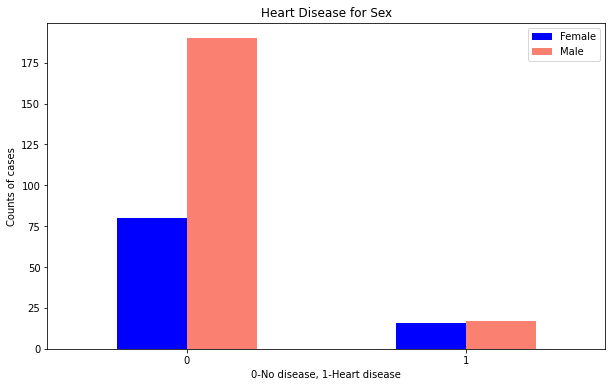

In [ ]:
#Analyzing data using the cross tabs
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['blue','salmon'])

#Adding the labels to the plot
plt.title('Heart Disease for Sex')
plt.xlabel('0-No disease, 1-Heart disease')
plt.ylabel('Counts of cases')
plt.legend(['Female','Male'])
plt.xticks(rotation=0); #keeps label on x axis vertical

**Lets analyze age vs heart rate**

Using a scatter plot to see how age and heart rate affect , heart rate

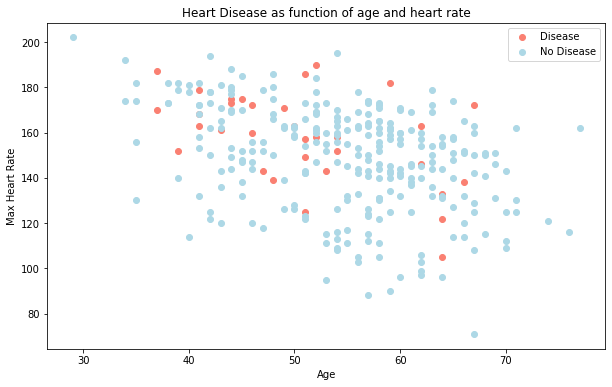

In [ ]:
plt.figure(figsize=(10,6))

#Plot the cases where heart disease is present i.e positive cases
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon')
#Plot the cases which has no heart disease i.e negative cases
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue');

#Adding the axis
plt.title('Heart Disease as function of age and heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);


**Heart Disease Frequency by Chest Pain type**


In [ ]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,134,9
1,44,6
2,71,16
3,21,2


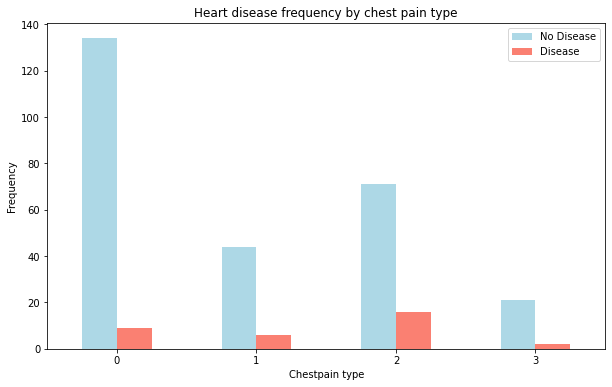

In [ ]:
#Visualize the above result to pictorially check if there is a greater risk of heart disease by chest pain
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['lightblue','salmon'])

#Adding the attributes to the plot
plt.title('Heart disease frequency by chest pain type')
plt.xlabel('Chestpain type')
plt.ylabel('Frequency')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);


In [ ]:
#correlations between different variables
corr_matrix=df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.139144
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.126255
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.124300
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.083246
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.049692
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.146006
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.072127
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.135118
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.153193
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.118876


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


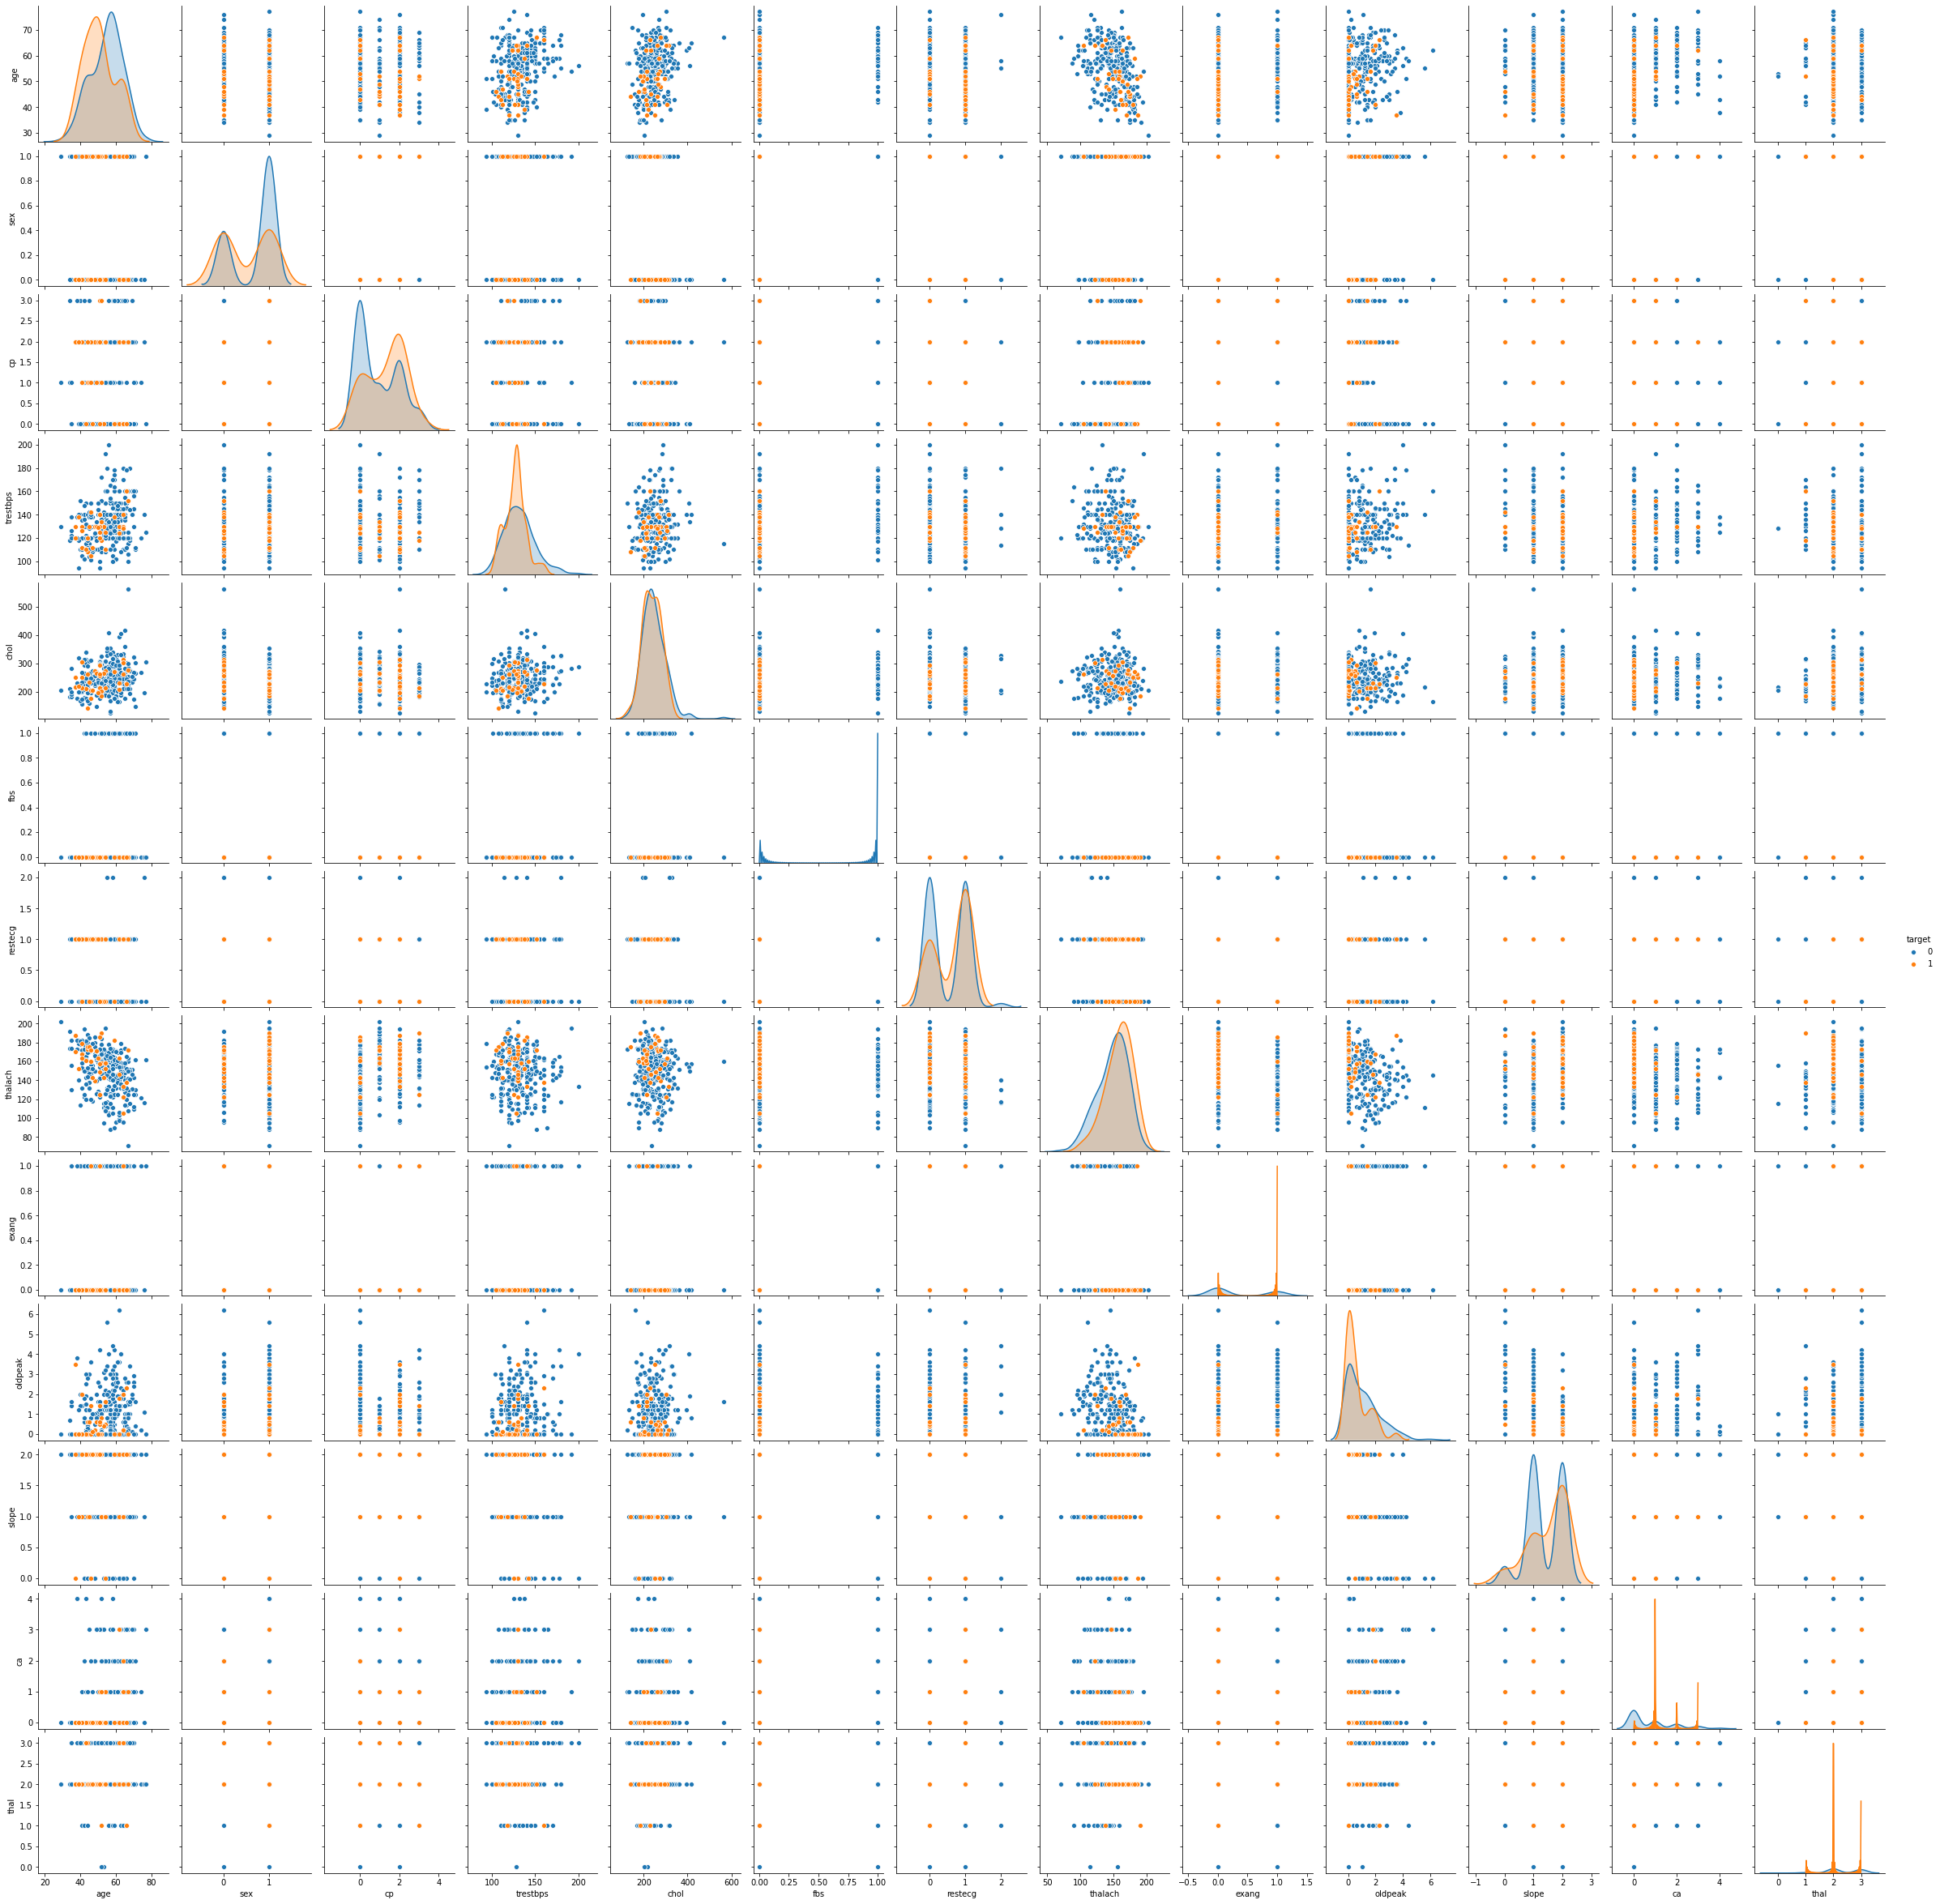

In [ ]:
#sns.pairplot(df,hue='target',kind='scatter')


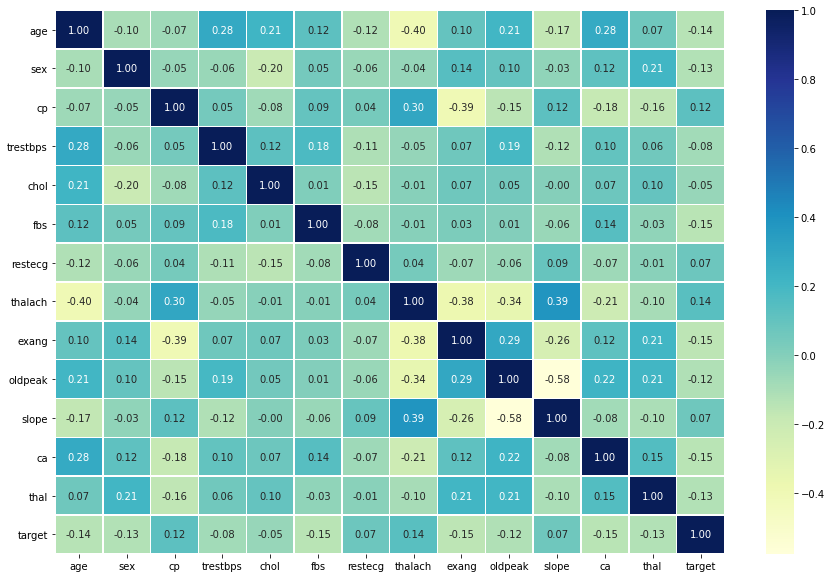

In [ ]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

The EDA can be done based on the insights we wish to draw from the data
Lets begin the next part of the analysis i.e the Modeling

**Modeling**

Lets try to get 95% accuracy in the train and test set to consider the model a success


In [ ]:
#check the data once again
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [ ]:
#Splitting the data into the predictor and response variables
X = df.drop('target',axis=1)
y=df['target']

In [ ]:
#checking the the above
X.shape,y.shape

((303, 13), (303,))

In [ ]:
#Splitting the data into training and test sets
#Random seed for reproducibility
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
#check the train test split lenghts
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

**First iteration , lets try to build the model without scaling the independent variables**

From the scikit learn model maps, lets pick few models to try :

1.Logistic Regression
2.K-nearest neighbours
3.Random Forest

[https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html](https://)

![Scikit Learn Model Selection Guide](https://scikit-learn.org/stable/_static/ml_map.png)



In [ ]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.

    models : a dict of different Scikit-Learn machine learning models
    
    X_train : training data
    
    X_test : testing data
    
    y_train : labels assosciated with training data
    
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.8688524590163934,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8852459016393442}

**Model Comparision**

Plotting the models to have a better visual of their performance

In [ ]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,KNN,Logistic Regression,Random Forest
accuracy,0.868852,0.885246,0.885246


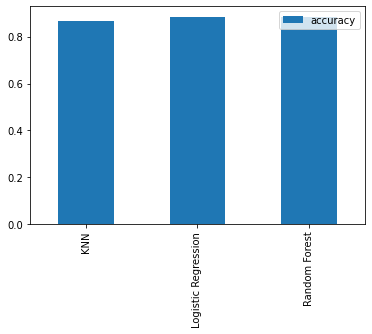

In [ ]:
#Plotting the results models
model_compare.T.plot.bar();

In [ ]:
#Repeating the above example with scaled data 
#Scaling the training data
scaler_train = StandardScaler().fit(X_train)
scaled_X_train = scaler_train.transform(X_train)
scaled_X_train[0:5,],scaled_X_train.shape

(array([[-1.35679832,  0.72250438,  0.00809909, -0.61685555,  0.91403366,
         -0.38330071,  0.8431327 ,  0.53278078, -0.67663234, -0.92086403,
          0.95390513, -0.68970073, -0.50904773],
        [ 0.38508599,  0.72250438, -0.97189094,  1.1694912 ,  0.43952674,
         -0.38330071, -1.04610909, -1.75358236,  1.47790748, -0.19378705,
          0.95390513, -0.68970073,  1.17848036],
        [-0.92132724,  0.72250438,  0.98808912,  1.1694912 , -0.30070405,
         -0.38330071,  0.8431327 , -0.13967897, -0.67663234,  2.3509824 ,
         -0.69498803, -0.68970073, -0.50904773],
        [ 0.05848269, -1.38407465,  0.00809909,  0.27631782,  0.0599212 ,
         -0.38330071, -1.04610909,  0.48795013, -0.67663234,  0.35152069,
         -0.69498803, -0.68970073, -0.50904773],
        [ 0.60282153,  0.72250438, -0.97189094, -0.79549023, -0.31968433,
          2.60891771,  0.8431327 ,  0.44311948,  1.47790748,  0.35152069,
          0.95390513,  1.33342142,  1.17848036]]), (242, 13))

In [ ]:
#converting the numpy array to dataframe
scaled_X_train=pd.DataFrame(data=scaled_X_train,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
scaled_X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.356798,0.722504,0.008099,-0.616856,0.914034,-0.383301,0.843133,0.532781,-0.676632,-0.920864,0.953905,-0.689701,-0.509048
1,0.385086,0.722504,-0.971891,1.169491,0.439527,-0.383301,-1.046109,-1.753582,1.477907,-0.193787,0.953905,-0.689701,1.178480
2,-0.921327,0.722504,0.988089,1.169491,-0.300704,-0.383301,0.843133,-0.139679,-0.676632,2.350982,-0.694988,-0.689701,-0.509048
3,0.058483,-1.384075,0.008099,0.276318,0.059921,-0.383301,-1.046109,0.487950,-0.676632,0.351521,-0.694988,-0.689701,-0.509048
4,0.602822,0.722504,-0.971891,-0.795490,-0.319684,2.608918,0.843133,0.443119,1.477907,0.351521,0.953905,1.333421,1.178480


In [ ]:
#Converting the X_test data into the scaled form

scaler_test = StandardScaler().fit(X_test)
scaled_X_test = scaler_test.transform(X_test)
scaled_X_test[0:5,],scaled_X_test.shape


(array([[ 0.35193805,  0.5204165 , -0.81722423,  0.6923507 ,  0.67069876,
         -0.54577682, -0.86189161, -1.4382206 ,  1.28536917, -0.39933567,
         -0.48574449,  0.07315072, -2.00597821],
        [ 0.58528828,  0.5204165 ,  2.00451227,  1.72875297,  0.92195336,
         -0.54577682, -0.86189161,  0.45063806, -0.77798661, -0.69282333,
         -0.48574449, -0.81928803,  0.94256808],
        [ 0.35193805,  0.5204165 ,  1.06393343,  0.6923507 , -2.46998376,
          1.83225076,  1.1602387 ,  1.01327681, -0.77798661, -0.69282333,
          1.07375098,  0.07315072,  0.94256808],
        [ 0.23526294, -1.92153785, -0.81722423, -0.13677112,  3.45543726,
         -0.54577682, -0.86189161,  0.08894172,  1.28536917,  0.55449923,
         -0.48574449,  0.96558946,  0.94256808],
        [ 1.98538967, -1.92153785,  1.06393343, -1.38045385,  0.44038204,
          1.83225076, -0.86189161, -0.71482792, -0.77798661, -0.83956716,
          1.07375098,  0.07315072, -0.53170507]]), (61, 13))

In [ ]:
#converting the numpy array to dataframe
scaled_X_test=pd.DataFrame(data=scaled_X_test,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
scaled_X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.351938,0.520416,-0.817224,0.692351,0.670699,-0.545777,-0.861892,-1.438221,1.285369,-0.399336,-0.485744,0.073151,-2.005978
1,0.585288,0.520416,2.004512,1.728753,0.921953,-0.545777,-0.861892,0.450638,-0.777987,-0.692823,-0.485744,-0.819288,0.942568
2,0.351938,0.520416,1.063933,0.692351,-2.469984,1.832251,1.160239,1.013277,-0.777987,-0.692823,1.073751,0.073151,0.942568
3,0.235263,-1.921538,-0.817224,-0.136771,3.455437,-0.545777,-0.861892,0.088942,1.285369,0.554499,-0.485744,0.965589,0.942568
4,1.985390,-1.921538,1.063933,-1.380454,0.440382,1.832251,-0.861892,-0.714828,-0.777987,-0.839567,1.073751,0.073151,-0.531705


In [ ]:
#Repeating the entire modeling exercise above for the scaled data
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models,scaled_X_train,scaled_X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.

    models : a dict of different Scikit-Learn machine learning models
    
    scaled_X_train : scaled training data
    
    scaled_X_test : scaled testing data
    
    y_train : labels assosciated with training data
    
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(scaled_X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(scaled_X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             scaled_X_train=scaled_X_train,
                             scaled_X_test=scaled_X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.8852459016393442,
 'Logistic Regression': 0.8688524590163934,
 'Random Forest': 0.8852459016393442}

In [ ]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,KNN,Logistic Regression,Random Forest
accuracy,0.885246,0.868852,0.885246


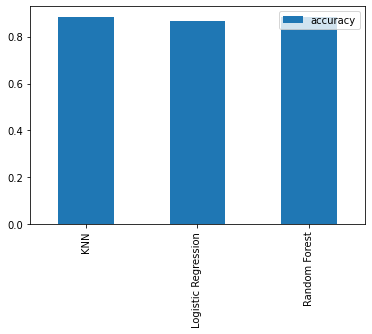

In [ ]:
#Plottinng the model scores
model_compare.T.plot.bar();

We observe that there is an increase in accuracy of the KNN model for the scaled data , as this model is based on the distances between data poinnts, hence scaling the data improves accuracy. The data poinnts and features that have higher values are not given added weight in the model, hence the accuracy of the model improves.
Other models are not based on distancces like RF etc. so their acccuracy is unchanged

**Next course of Action**

Tune model hyperparameters, see which performs best

Perform cross-validation

Plot ROC curves

Make a confusion matrix

Get precision, recall and F1-score metrics

Find the most important model features

In [ ]:
#create a list of empty train scores
train_scores = []
#create a list of empty test scores
test_scores = []

#create a list of n neighbours
neighbors = range(1,21)

#set up knn algorithm
Knn = KNeighborsClassifier()

# Loop through different neighbour values
for i in neighbors:
  Knn.set_params(n_neighbors = i)#set the neighbors value

#fitting the model
  Knn.fit(X_train,y_train)

#update training scores
  train_scores.append(Knn.score(X_train,y_train))

#update test scores
  test_scores.append(Knn.score(X_test,y_test))

In [ ]:
#CHECKING the sample train , test scores
train_scores[0:5],test_scores[0:5]

([1.0,
  0.9008264462809917,
  0.9008264462809917,
  0.8966942148760331,
  0.8966942148760331],
 [0.819672131147541,
  0.8852459016393442,
  0.8852459016393442,
  0.8688524590163934,
  0.8688524590163934])

Maximum KNN test score:88.52%


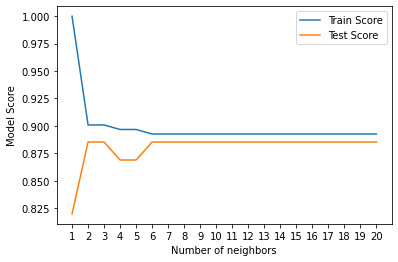

In [ ]:
#Plotting the results for better understanding
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend()
print(f'Maximum KNN test score:{max(test_scores)*100:.2f}%');

The max test score is observed for neighbors = 6.

However since the KNN is not competitive with either Logistic regression or RF, we discard it , and continue to improve the accuracy through these two models

*Tuning the models with RandomizedSearchCV*

Lets create a hyperparamter grid(dictionary of different hyperparameters) for LR and RF and test them

In [ ]:
#Logistic Regression Hyperparamters
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver':['newton-cg', 'lbfgs', 'liblinear']}
#Random Forest Hyperparamters
rf_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}

In [ ]:
#Use the RandomiedSearchCV to obtain best params
#set up random seed
np.random.seed(42)
#Set up RandomizedSearchCV for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,n_iter=20,cv=5,verbose=True)

#fitting the model to training data
rs_log_reg.fit(X_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [ ]:
rs_log_reg.best_params_

{'C': 0.0001, 'solver': 'newton-cg'}

In [ ]:
#finding the scores for best parameters on training and test sets
rs_log_reg.score(X_train,y_train),rs_log_reg.score(X_test,y_test)

(0.8925619834710744, 0.8852459016393442)

In [ ]:
#Repeating the steps above for the Random Forest model
#setting the random seed
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid, n_iter=10,cv=5,verbose=True)

#Fit the randomhyperparamter search model
rs_rf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.2s finished


In [ ]:
rs_rf.best_params_,rs_rf.best_score_

({'max_depth': None,
  'min_samples_leaf': 9,
  'min_samples_split': 16,
  'n_estimators': 10},
 0.8926020408163267)

In [ ]:
#scoring the model for the test set
rs_rf.score(X_test,y_test)

0.8852459016393442

In [ ]:
#checking out different values for CV to find which values is best
train_scores = []
test_scores = []

cv = range(2,10,1)

for i in cv:
  np.random.seed(42)
  rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid, n_iter=10,cv=i,verbose=True,n_jobs=-1)
  #Fit the randomhyperparamter search model
  rs_rf.fit(X_train,y_train)
  train_scores.append(rs_rf.best_score_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   21.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   26.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   32.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   37.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   43.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 9 folds for each of 10 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   48.5s finished


In [ ]:
train_scores

[0.8925619834710744,
 0.8925925925925925,
 0.8926229508196721,
 0.8926020408163267,
 0.8926829268292683,
 0.8926770708283315,
 0.892741935483871,
 0.8926875593542261]

In [ ]:
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 9,
 'min_samples_split': 16,
 'n_estimators': 10}

In [ ]:
rs_rf.score(X_test,y_test)

0.8852459016393442

*Tuning the model with grid search*

In [ ]:
#setting the parameters for grid search
#Logistic Regression Hyperparamters
log_reg_gs_grid = {'C':np.logspace(-4,4,20),
                'solver':['newton-cg', 'lbfgs', 'liblinear']}
#Random Forest Hyperparamters
rf_gs_grid = {'n_estimators':np.arange(10,100,10),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,10,2)}

In [ ]:
#checking the logistic regression model
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_gs_grid,
                          cv=5,
                          verbose = True)

#Fit grid hyper parameter search model
gs_log_reg.fit(X_train,y_train);


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

In [ ]:
#best params
gs_log_reg.best_params_,gs_log_reg.best_score_

({'C': 0.0001, 'solver': 'newton-cg'}, 0.8926020408163267)

In [ ]:
#model score on the test dataset
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [ ]:
#getting the prediction on test set for above model
y_preds=gs_log_reg.predict(X_test)

In [ ]:
#getting the classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        54
           1       0.00      0.00      0.00         7

    accuracy                           0.89        61
   macro avg       0.44      0.50      0.47        61
weighted avg       0.78      0.89      0.83        61



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#training the random forest using grid search
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid =rf_gs_grid,
                     cv=5,
                     n_jobs=-1)
                     
#fitting the model on training set
gs_rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 10}

In [ ]:
gs_rf.score(X_test,y_test)

0.8852459016393442

In [ ]:
y_preds_rf = gs_rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_preds_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        54
           1       0.00      0.00      0.00         7

    accuracy                           0.89        61
   macro avg       0.44      0.50      0.47        61
weighted avg       0.78      0.89      0.83        61



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating a classification model, beyond accuracy
Now we've got a tuned model, let's get some of the metrics 

We want:

ROC curve and AUC score - plot_roc_curve()

Confusion matrix - confusion_matrix()

Classification report - classification_report()

Precision - precision_score()

Recall - recall_score()

F1-score - f1_score()

In [ ]:
#using the trained RF model with best params to get the scores for cross validated metrics
#Import cross val score
from sklearn.model_selection import cross_val_score

#Instantiate best model with best hyperparamters
clf = RandomForestClassifier(n_estimators=10,max_depth=2,min_samples_leaf=1,min_samples_split=6,n_jobs=-1)

In [ ]:
#calculate the cross validated scores
cv_acc = np.mean(cross_val_score(clf,X,y,cv=5,n_jobs=-1,scoring='accuracy'))
cv_acc

0.8911475409836065

In [ ]:
cv_precision = np.mean(cross_val_score(clf,X,y,cv=5,n_jobs=-1,scoring='precision'))
cv_precision

0.0

In [ ]:
cv_f1 = np.mean(cross_val_score(clf,X,y,cv=5,n_jobs=-1,scoring='f1'))
cv_f1

0.0

In [ ]:
cv_recall = np.mean(cross_val_score(clf,X,y,cv=5,n_jobs=-1,scoring='recall'))
cv_recall

0.0

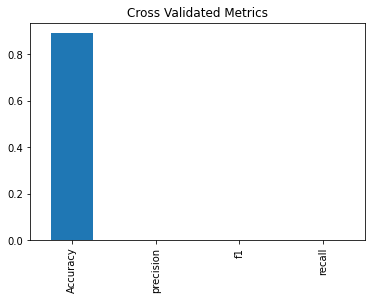

In [ ]:
#Visualizing the metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'precision':cv_precision,
                           'f1':cv_f1,
                           'recall':cv_recall},index=[0])
#Plotting the metrics
cv_metrics.T.plot.bar(title='Cross Validated Metrics',legend=False);

In [ ]:
#Lets try the logistics regression to see if it can fare better 
clf_log=LogisticRegression(C=0.1,solver='newton-cg')

In [ ]:
cv_accuracy_log = np.mean(cross_val_score(clf_log,X,y,cv=5,scoring='accuracy'))
cv_accuracy_log

0.8911475409836065

In [ ]:
cv_precision_log = np.mean(cross_val_score(clf_log,X,y,n_jobs=-1,cv=5,scoring='precision'))
cv_precision_log

0.0

In [ ]:
#recall
cv_recall_log = np.mean(cross_val_score(clf_log,X,y,n_jobs=-1,cv=5,scoring='recall'))
cv_recall_log

0.0

In [ ]:
#print classification metrics
clf_log.fit(X_train,y_train)
y_preds_log = clf_log.predict(X_test)
print(classification_report(y_test,y_preds_log));

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        54
           1       0.00      0.00      0.00         7

    accuracy                           0.89        61
   macro avg       0.44      0.50      0.47        61
weighted avg       0.78      0.89      0.83        61



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test.value_counts()

0    54
1     7
Name: target, dtype: int64

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

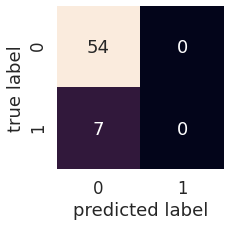

In [ ]:
# making the confusion matrix
import seaborn as sns
sns.set(font_scale=1.5)
def plot_conf_matrix(y_test,y_preds):
  '''
  plot the confusion matrix
  '''
  fig,ax = plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                 annot=True,#annotate boxes
                 cbar=False)
  plt.ylabel('true label')
  plt.xlabel('predicted label')

plot_conf_matrix(y_test,y_preds_log)


Because this is an unbalanced dataset, the models are unstable and not able to predict the values of the minority class with high degree of precision

**Using the SMOTE technique for oversampling**

Since the models are not performing optimally due to imbalanced data, lets use SMOTE technique to synthetically enhance our minority class data



In [ ]:
#loading the imbalanced learn SMOTE 
from imblearn.over_sampling import SMOTE
smote = SMOTE()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#oversampling using SMOTE
X_train_smote,y_train_smote = smote.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#CHECKING whether the data is now balanced
from collections import Counter
print('Before SMOTE',Counter(y_train))
print('After SMOTE',Counter(y_train_smote))

Before SMOTE Counter({0: 216, 1: 26})
After SMOTE Counter({0: 216, 1: 216})


We see that the data is now balanced

In [ ]:
#Lets try the models tried earlier with the new data
#make a function to take check the scores for different ML MODELS
models = {'KNN':KNeighborsClassifier(),
          'Logistic Regression':LogisticRegression(),
          'Random Forest':RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
  '''
  Trains and scores the ML Models
  '''
  #Random seed for reproducible results
  model_scores={}
  #Loop through models
  for name, model in models.items():
    #Fit model to training dataset
    model.fit(X_train,y_train)
    #Evaluate model and append its scores to model_scores
    model_scores[name] = model.score(X_test,y_test)
  return model_scores;

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train = X_train_smote,
                             X_test=X_test,
                             y_train = y_train_smote,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.7377049180327869,
 'Logistic Regression': 0.7377049180327869,
 'Random Forest': 0.8524590163934426}

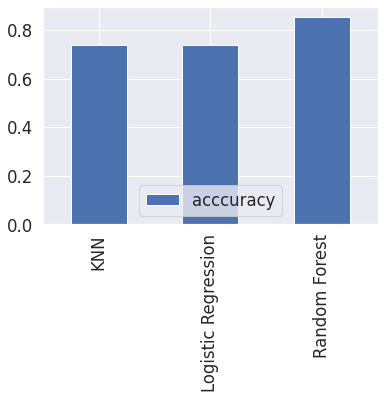

In [ ]:
#Plotting the accuracy of the models
model_compare = pd.DataFrame(model_scores,index=['acccuracy'])
model_compare.T.plot.bar();

In [ ]:
#check the test scores for the data without smote
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test=X_test,
                             y_train = y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.8688524590163934,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8852459016393442}

In [ ]:
#Random Forest Hyperparamters
rf_gs_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,10,2),
           'min_samples_leaf':np.arange(1,10,2)}

In [ ]:
#training the random forest using grid search
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid =rf_gs_grid,
                     cv=5,
                     n_jobs=-1)
                     
#fitting the model on training set
gs_rf.fit(X_train_smote[0:100,],y_train_smote[0:100,])

**Lets try XGBOOST to check if it can perform better**

In [ ]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
#importing the necessary libraries
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Time taken: 0 hours 0 minutes and 2.72 seconds.


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    2.6s finished


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([0.36284189, 0.48106375, 0.32146239, 0.28331151, 0.43711753]), 'std_fit_time': array([0.01770548, 0.00657971, 0.00502581, 0.00343818, 0.14232923]), 'mean_score_time': array([0.00747766, 0.00755062, 0.01012802, 0.00493507, 0.00699682]), 'std_score_time': array([0.00332348, 0.00352606, 0.00522762, 0.00292586, 0.00325747]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dt

In [ ]:
grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3 )
grid.fit(X, y)
print('\n All results:')
print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)
#results.to_csv('xgb-grid-search-results-01.csv', index=False)

y_test = grid.best_estimator_.predict_proba(test)
# results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   21.5s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:   38.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed:  2.1min



 All results:
{'mean_fit_time': array([0.3515852 , 0.33739867, 0.28986163, 0.2536469 , 0.27995896,
       0.2905591 , 0.19239173, 0.20542345, 0.22532153, 0.37847342,
       0.38989887, 0.36367717, 0.25689993, 0.27764816, 0.28555794,
       0.20322094, 0.20470233, 0.22575526, 0.40846639, 0.42482877,
       0.42457285, 0.25500412, 0.27705002, 0.29350638, 0.21425352,
       0.23209443, 0.23181171, 0.33445029, 0.33077664, 0.3093462 ,
       0.25636992, 0.28145571, 0.27442751, 0.20025125, 0.20944433,
       0.22439375, 0.37517614, 0.3866199 , 0.35855246, 0.2596848 ,
       0.28138776, 0.28497643, 0.21322021, 0.20089149, 0.21975789,
       0.40511618, 0.42712121, 0.43050179, 0.26663127, 0.27508311,
       0.28423233, 0.19378324, 0.20073166, 0.22378292, 0.32293267,
       0.34050221, 0.29987073, 0.26649365, 0.30460343, 0.28103867,
       0.19756479, 0.20837822, 0.22370963, 0.37816191, 0.39920335,
       0.37429743, 0.23995867, 0.28417673, 0.29111991, 0.20032778,
       0.2002161 , 0.22401476

[Parallel(n_jobs=4)]: Done 2025 out of 2025 | elapsed:  2.9min finished


NameError: ignored

Trying the XGBOOST algorithm on prev. train test split, as well as synthetic dataset generated by SMOTE

In [ ]:
#Fit model on training data
model = XGBClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
accuracy = accuracy_score(y_test,y_preds)
print(f'The accuracy score is {accuracy*100:.2f}%')

The accuracy score is 86.89%


In [ ]:
#CLASSIFICATION REPORT
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        54
           1       0.00      0.00      0.00         7

    accuracy                           0.87        61
   macro avg       0.44      0.49      0.46        61
weighted avg       0.78      0.87      0.82        61



In [ ]:
#checking the other metrics for binary classification
metrics = {'accuracy':accuracy_score(y_test,y_preds),
           'precision':precision_score(y_test,y_preds),
           'f1':f1_score(y_test,y_preds),
           'recall':recall_score(y_test,y_preds)}

def train_and_score(metrics,X_train,X_test,y_train,y_test):
  '''
  fit the training data to XGBoost model and return the metrics
  '''
  #Random seed for reproducible results
  np.random.seed(42)
  model_scores ={}
  
  model = XGBClassifier()
  model.fit(X_train,y_train)
  ypreds=model.predict(X_test)
  #loop through the metrics
  for name, metric in metrics.items():
    metric_score[name] = metrics.values()
  return metric_score

In [ ]:
train_and_score(metrics,X_train,X_test,y_train,y_test)

NameError: ignored

In [ ]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#checking the accuracy on base model of XGB using SMOTE to generate synthetic data
model = XGBClassifier()
model.fit(X_train_smote,y_train_smote)
y_preds_smote = model.predict(X_test)
accuracy_smote = accuracy_score(y_test,y_preds_smote)
print(f'The accuracy score for smote is {accuracy_smote*100:.2f}%')


The accuracy score for smote is 85.25%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(classification_report(y_test,y_preds_smote))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        54
           1       0.00      0.00      0.00         7

    accuracy                           0.85        61
   macro avg       0.44      0.48      0.46        61
weighted avg       0.78      0.85      0.81        61



In [ ]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
X_train_smote=pd.DataFrame(X_train_smote,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [ ]:
y_train_smote=pd.DataFrame(y_train_smote,columns=['target'])

NameError: ignored

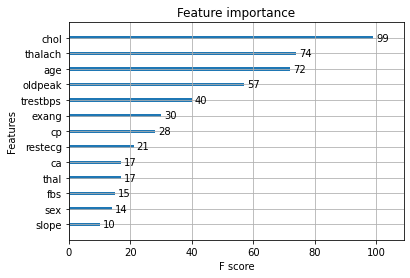

In [ ]:
from xgboost import plot_importance
plot_importance(model)
py_plot.show();

In [ ]:
import xgboost as xgb
train = xgb.DMatrix(X_train,y_train)
test = xgb.DMatrix(X_test,y_test)

In [ ]:
param={'max_depth':4,
       'eta':0.3,
       'objective':'multi:softmax',
       'num_class':2}

epochs = 10

In [ ]:
model = xgb.train(param,train,epochs)
y_preds=model.predict(test)

In [ ]:
accuracy_score(y_test,y_preds)

0.8688524590163934

In [ ]:
#grid search paramters
#importing the necessary libraries
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.2,0.4,0.6,0.8],
        'subsample': [0.2,0.4,0.6],
        'colsample_bytree': [0.2,0.4,0.6],
        'max_depth': [3, 4, 5]
        }

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(XGBClassifier(),param_grid=params,scoring=None,n_jobs=-1,cv=kfold)
result=grid_search.fit(X,y)

In [ ]:
result.best_score_,result.best_params_

(0.8946236559139786,
 {'colsample_bytree': 0.6,
  'gamma': 0.2,
  'max_depth': 3,
  'min_child_weight': 5,
  'subsample': 0.6})

In [ ]:
model_1 = XGBClassifier(params=result.best_params_)
model_1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'colsample_bytree': 0.6, 'gamma': 0.2, 'max_depth': 3,
                      'min_child_weight': 5, 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
y_preds=model_1.predict(X_test)
accuracy_score(y_test,y_preds)

0.8524590163934426

In [ ]:
y_preds_train=model_1.predict(X_train)
accuracy_score(y_train,y_preds_train)

0.9462809917355371

In [ ]:
model_1 = XGBClassifier(params=result.best_params_)
model_1.fit(X_train_smote,y_train_smote)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'colsample_bytree': 0.6, 'gamma': 0.2, 'max_depth': 3,
                      'min_child_weight': 5, 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)